# Final Report 
Group members: Loay Al-Abri, Roy Oh

In [1]:
library(tidyverse)
library(tidymodels)
library(scales)
library(GGally)
library(broom)
library(Metrics)
library(ggplot2)
library(gridExtra)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.5     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Introduction

In today’s digital age, platforms like Instagram and Twitter measure popularity through “Likes,” which have become increasingly valuable in the online ecosystem. Similarly, GitHub, the world’s largest website of open-source projects, measures interest and popularity through “Stars,” reflecting user engagement with a repository’s content.

Understanding the factors that influence the number of stars a repository receives can provide valuable insights that make ceratin open-source projects more appealing and widely addopted. Specifically, examining how repository features like the number of forks, issues, and size are associated with popularity or stars can highlight the attributes of successful projects. 

Our project uses a data set from Kaggle called "Most Popular Github Repositories (Projects)." This data set consists over 215,000+ top projects by star with over 167 stars. The author of this data set collected the data by using Github search API.

The data set is found here: https://www.kaggle.com/datasets/donbarbos/github-repos/data

The data set contains 24 variables:

- **Name**: Name of the GitHub repository
- **Description** : A brief textual description that summarizes the purpose or focus of the repository
- **URL** : The URL or web address that links to the GitHub repository, which is a unique identifier for the repository
- **Created At**: Date and time when the repository was initially created in ISO 8601 format (eg. 2020-07-10 15:00:00.000)
- **Updated At** The date and time of the most recent update or modification to the repository, in ISO 8601 format
- **Homepage**:The URL to the homepage or landing page associated with the repository, providing additional information or resources
- **Size**:	The size of the repository in bytes, indicating the total storage space used by the repository's files and data
- **Stars** : The number of stars or likes that the repository has received from other GitHub users, indicating its popularity or interest
- **Forks**: The number of times the repository has been forked by other GitHub users. A fork is a copy of a repository that allows you to freely experiment with changes to a project without affecting the original repository.
- **Issues**: The total number of open issues
- **Watchers**: The number of GitHub users who are "watching" or monitoring the repository for updates and changes
- **Language**:	The primary programming language
- **License**: Information about the software license using a license identifier
- **Topics**: A list of topics or tags associated with the repository, helping users discover related projects and topics of interest
- **Has Issues**: A boolean value indicating whether the repository has an issue tracker enabled. In this case, it's true, meaning it has an issue tracker
- **Has Projects**: A boolean value indicating whether the repository uses GitHub Projects to manage and organize tasks and work items
- **Has Downloads**: A boolean value indicating whether the repository offers downloadable files or assets to users
- **Has Wiki**:	A boolean value indicating whether the repository has an associated wiki with additional documentation and information
- **Has Pages**: A boolean value indicating whether the repository has GitHub Pages enabled, allowing the creation of a website associated with the repository.
- **Has Discussions**: A boolean value indicating whether the repository has GitHub Discussions enabled, allowing community discussions and collaboration
- **Is Fork**: A boolean value indicating whether the repository is a fork of another repository. In this case, it's false, meaning it is not a fork
- **Is Archived**: A boolean value indicating whether the repository is archived. Archived repositories are typically read-only and are no longer actively maintained
- **Is Template**:	A boolean value indicating whether the repository is set up as a template
- **Default Branch**: The name of the default branch

The types of the variables are described below:

**Character (character)**: Name, Description, URL, Homepage, Language, License, Topics, Default Branch \
**Double (double)**: Size, Stars, Forks, Issues, Watchers \
**Logical (logical)**: Has Issues, Has Projects, Has Downloads, Has Wiki, Has Pages, Has Discussions \
**Datetime (date-time)**: Created At, Updated At

Our project aims to answer the question: **How is the stars received by a repository related to the number of times it has been forked, its number of issues, size and discussion settings?** 

Additionally, we hope our project will provide guidance to developers aiming to improve the visibility and engagement of their repositories.


This is an inferential question as we are focused on understanding the true relationship between the explanatory variables and the response instead of predicting the response for new observations. In this study, *Stars* would be the response variable and *Size, Issues,  Forks and Has_Discussions* will serve as the explanatory variables.

Some existing studies provide valuable information of understanding the factors that influence the popularity of github repositories which align to our research question.

"Understanding the Factors that Impact the Popularity of Github Respositories" by Borges et al. (2016) uses 2,500 popular respositories to answer several research questions related to popularity. The results indicated that organization owned repositories were more popular compared to those that were owned by individuals, constantly evolving and improving repositories were important factors to popularity, and stars had a strong correlation with forks.

"Study the correlation between the readme file of GitHub projects and their popularity" by Wang et al. (2023) study 5,000 github repositories to look into the relationship between readme file related factors and the popularity of the repository. Readme file related features included the number of images, links, updates, age, and etc. Similar to Borges et al. (2016), number of lists and the frequency of updates were significantly important factors that distinguished popular and non-popular repositories - the higher the count the more popular.

Extrapolating from the prior research papers, we expect that engagement with the repository and community-oriented features are vital in popularity. From our explanatory variables, has_discussions is considered a community-oriented feature which we expect to be postively associated with stars (popularity).

## Methods and Plan

### Exploratory Data Analysis

##### Data Cleaning

In [2]:
repositories <- read_csv("data/repositories.csv")
head(repositories)
nrow <- nrow(repositories)
print(paste("There are a total of ", nrow, "rows"))

Rows: 215029 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): Name, Description, URL, Homepage, Language, License, Topics, Defau...
dbl  (5): Size, Stars, Forks, Issues, Watchers
lgl  (9): Has Issues, Has Projects, Has Downloads, Has Wiki, Has Pages, Has ...
dttm (2): Created At, Updated At

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,⋯,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
<chr>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
freeCodeCamp,freeCodeCamp.org's open-source codebase and curriculum. Learn to code for free.,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24 17:49:19,2023-09-21 11:32:33,http://contribute.freecodecamp.org/,387451,374074,33599,248,⋯,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,main
free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-programming-books,2013-10-11 06:50:37,2023-09-21 11:09:25,https://ebookfoundation.github.io/free-programming-books/,17087,298393,57194,46,⋯,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,main
awesome,😎 Awesome lists about all kinds of interesting topics,https://github.com/sindresorhus/awesome,2014-07-11 13:42:37,2023-09-21 11:18:22,NA,1441,269997,26485,61,⋯,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,main
996.ICU,Repo for counting stars and contributing. Press F to pay respect to glorious developers.,https://github.com/996icu/996.ICU,2019-03-26 07:31:14,2023-09-21 08:09:01,https://996.icu,187799,267901,21497,16712,⋯,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,master
coding-interview-university,A complete computer science study plan to become a software engineer.,https://github.com/jwasham/coding-interview-university,2016-06-06 02:34:12,2023-09-21 10:54:48,NA,20998,265161,69434,56,⋯,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,main
public-apis,A collective list of free APIs,https://github.com/public-apis/public-apis,2016-03-20 23:49:42,2023-09-21 11:22:06,http://public-apis.org,5088,256615,29254,191,⋯,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,master


[1] "There are a total of  215029 rows"


Each observation (a repository) is its row, each column is a variable and each observation is in a cell, so this data is in a tidy format. We should modify the column names so there are no blank spaces between them. We will drop the following columns because they are not relevant to our questions and they represent text data that will make our model complicated :`Name`, `Language`, `Description`, `URL`, `Homepage`, `Topics` and `License`.

In [3]:
#Changing column names
colnames(repositories) <- gsub(" ", "_", colnames(repositories))
repositories <- repositories |>  select(-Name, -Homepage, -URL, -Topics, -License, -Description,-Created_At, -Updated_At, -Language) |>
                                 mutate(Has_Discussions = as.factor(Has_Discussions), 
                                        Has_Issues = as.factor(Has_Issues),
                                        Has_Projects = as.factor(Has_Projects),
                                        Has_Downloads = as.factor(Has_Downloads),
                                        Has_Wiki = as.factor(Has_Wiki), 
                                        Has_Pages= as.factor(Has_Pages), 
                                        Is_Fork = as.factor(Is_Fork), 
                                        Is_Archived = as.factor(Is_Archived), 
                                        Is_Template = as.factor(Is_Template)) |>
                                        mutate(
                                          Default_branch = case_when(
                                          `Default_Branch` == "master" ~ "master",
                                          `Default_Branch` == "main" ~ "main",
                                           TRUE ~ "other"
        )
    )                             

In [4]:
#Observing if there are any NA values
repos_train_nas <- data.frame(colSums(is.na(repositories)))
print("Variables that have NA values")
repos_train_nas |> rename(Number_nas = colSums.is.na.repositories.. ) |> filter(Number_nas > 0)

[1] "Variables that have NA values"


Number_nas
<dbl>


None of the variables have missing values. 

Since the data is extremely large, we take a sample of size 20000 from the data to reduce the computational time. Before we do our data analysis, we will split the data into training and testing. We keep a 75-25 split for training - testing. 

In [5]:
set.seed(1234)
repos_sample<-  repositories |>
                sample_n(20000, replace = FALSE)
repos_split <- initial_split(repos_sample, prop= 0.75, strata = Stars)
repos_train <- training(repos_split)
repos_test <- testing(repos_split)


In [6]:
prop <- function(col) {
    mean(col == TRUE)
}

count_categories <- repos_train|>
                    select(Has_Discussions, Has_Issues, Has_Projects, Has_Downloads, Has_Wiki, Has_Pages, Is_Fork, Is_Archived, Is_Template) |>
                    summarise(across(Has_Discussions: Is_Template, prop))
print("Proportion of True Values in the logical variables")
count_categories


[1] "Proportion of True Values in the logical variables"


Has_Discussions,Has_Issues,Has_Projects,Has_Downloads,Has_Wiki,Has_Pages,Is_Fork,Is_Archived,Is_Template
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1283419,0.9683312,0.8659244,0.990466,0.7872525,0.1744116,0,0.06733782,0.005333689


In [7]:
repos_summaries <- repos_train |>
                    select_if(is.numeric) |>
                    map_df(mean)
print("Mean Values of the logical variables")
repos_summaries


[1] "Mean Values of the logical variables"


Size,Stars,Forks,Issues,Watchers
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
51795.82,1101.105,219.3806,38.53397,1101.105


We see that there is a lot of imabalance in most logical variables and only variables so from now onwards, we only work with the logical variables  `Has_Wiki`, `Has_Discussions`, `Has_Pages`, `Has_Projects`

In [8]:
repos_train <-  repos_train |>
                select(Stars, Issues, Forks, Size, Has_Discussions, Has_Wiki, Has_Pages, Has_Projects)


#### Exploratory Data Visualistions

First, we will explore the distribution of covariates and the response variable

Warning message:
“Removed 232 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


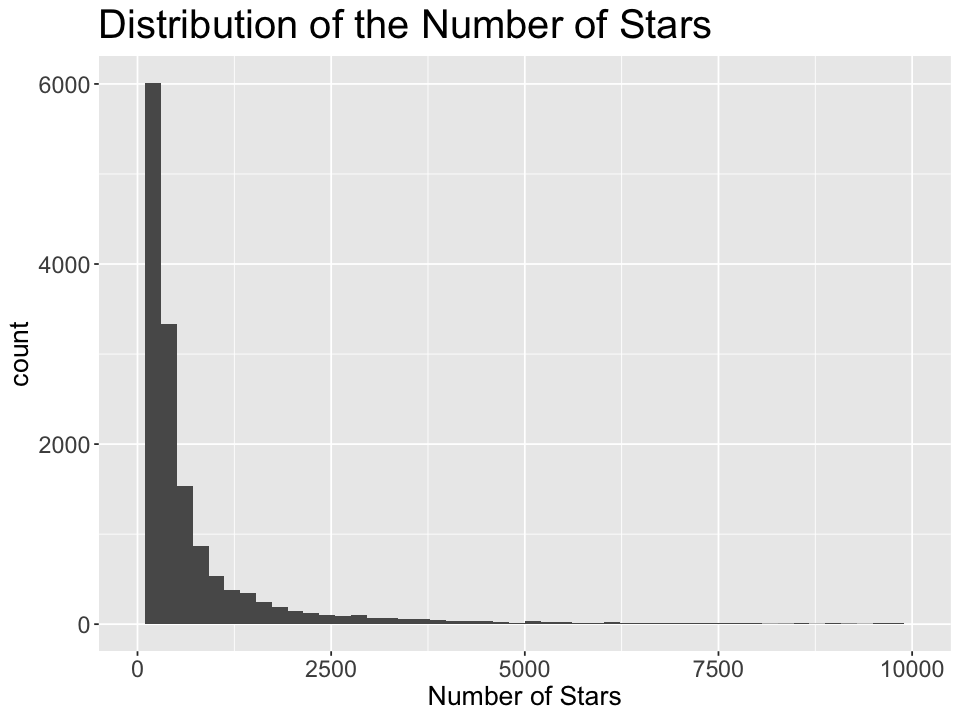

In [9]:
options(repr.plot.width = 8, repr.plot.height = 6)
stars_dist <- repos_train %>%
    ggplot(aes(Stars)) + 
    geom_histogram(bins = 50) + 
    scale_x_continuous(limits = c(0, 10000)) +
    labs(title = "Distribution of the Number of Stars",
    x = "Number of Stars") +
    theme(
    plot.title = element_text(size = 24),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),
  )
stars_dist

The distribution is right-skewed with many extereme values. However, most repositories have the between 0 and 2500 stars. This might leed to poor predictions with the model. We may need to transfrom the response variable using log function. Also, we have a lot of outliers.

##### Now, we will assess the relationship between response and covariates

We will treat Stars, Forks, Issues and Size as continuous variables for our analysis. Since our goal is to assess the relationship between Stars and the other covariates, and we have one categorical and 3 continuous predictors, we will create a combination of scatter plots. These plots would help us visualise the direction, strength and form of the relationship (linear, quadratic, etc.) between the response and the covariates. 

We now create the following scatterplots:
 - Scatterplot of Stars Vs Issues, stratified on  Has_Discussions (Figure 1)
 - Scatterplot of Stars Vs Forks, stratified on  Has_Discussions (Figure 2)
 - Scatterplot of Stars Vs Size, stratified on  Has_Discussions (Figure 3)

For the plots we transform the x and y axis on a log scale because if we did not do that, we would find a large number of points accumulated in one small region of the graph. 

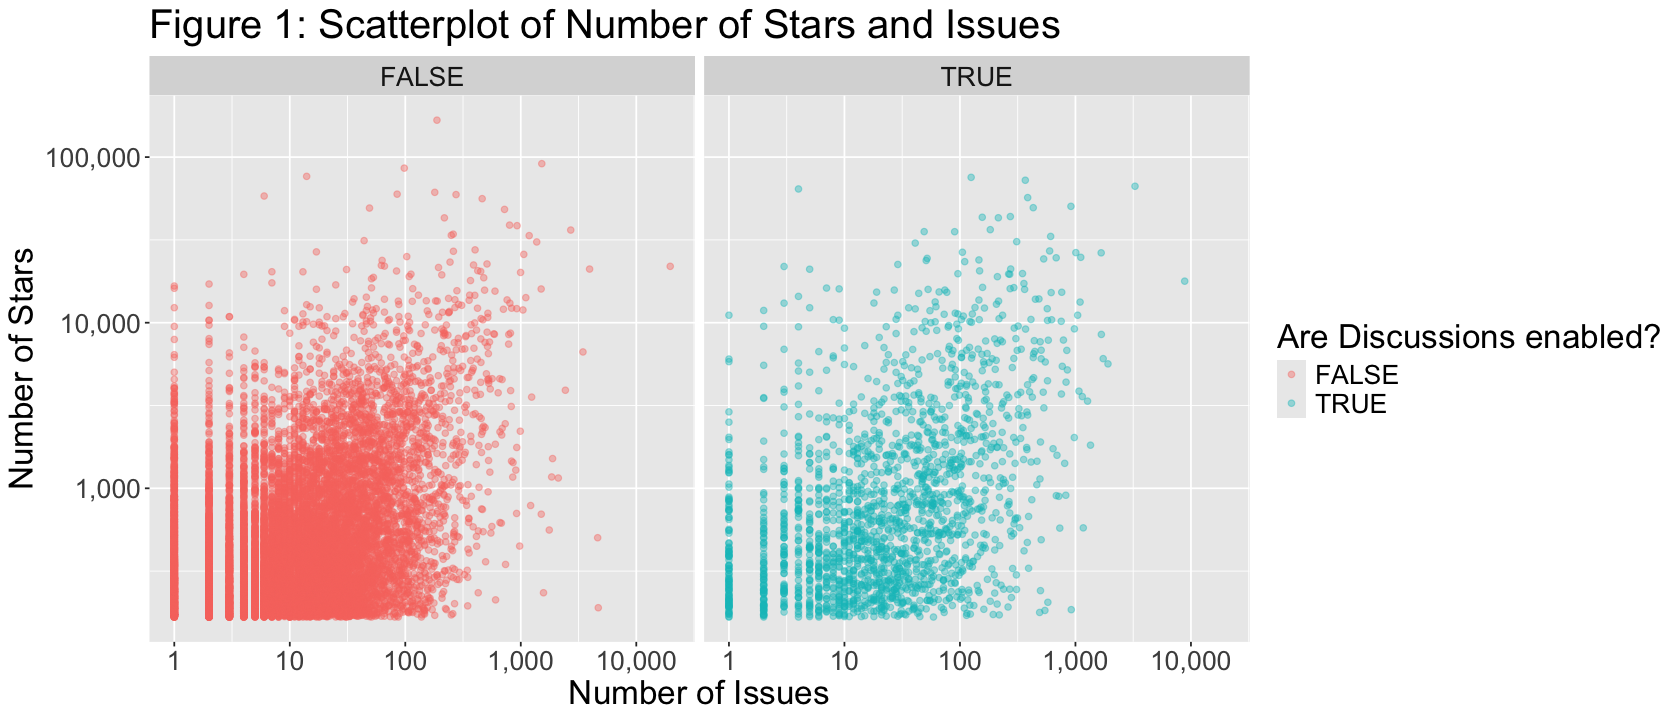

In [10]:
# In order to do log transforms, we add a constant 1 so that x values of 0 do not map to -infinity. 
options(repr.plot.width = 14, repr.plot.height = 6)

repos_train <- repos_train|> mutate(Issues = Issues + 1, Forks = Forks + 1, Size = Size + 1)
stars_issues <- ggplot(repos_train, aes(x = Issues, y = Stars, color =  Has_Discussions)) + 
                     geom_point(alpha = 0.4, size = 1.5) + 
                     ggtitle("Figure 1: Scatterplot of Number of Stars and Issues") + 
                     labs(x = "Number of Issues",y = "Number of Stars", color = "Are Discussions enabled?") +
                     facet_wrap(vars(Has_Discussions)) + 
                     scale_x_continuous(labels = comma, trans = "log10") + 
                     scale_y_continuous(labels = comma, trans = "log10") + 
                     theme(text = element_text(size = 20)) 
        
stars_issues 

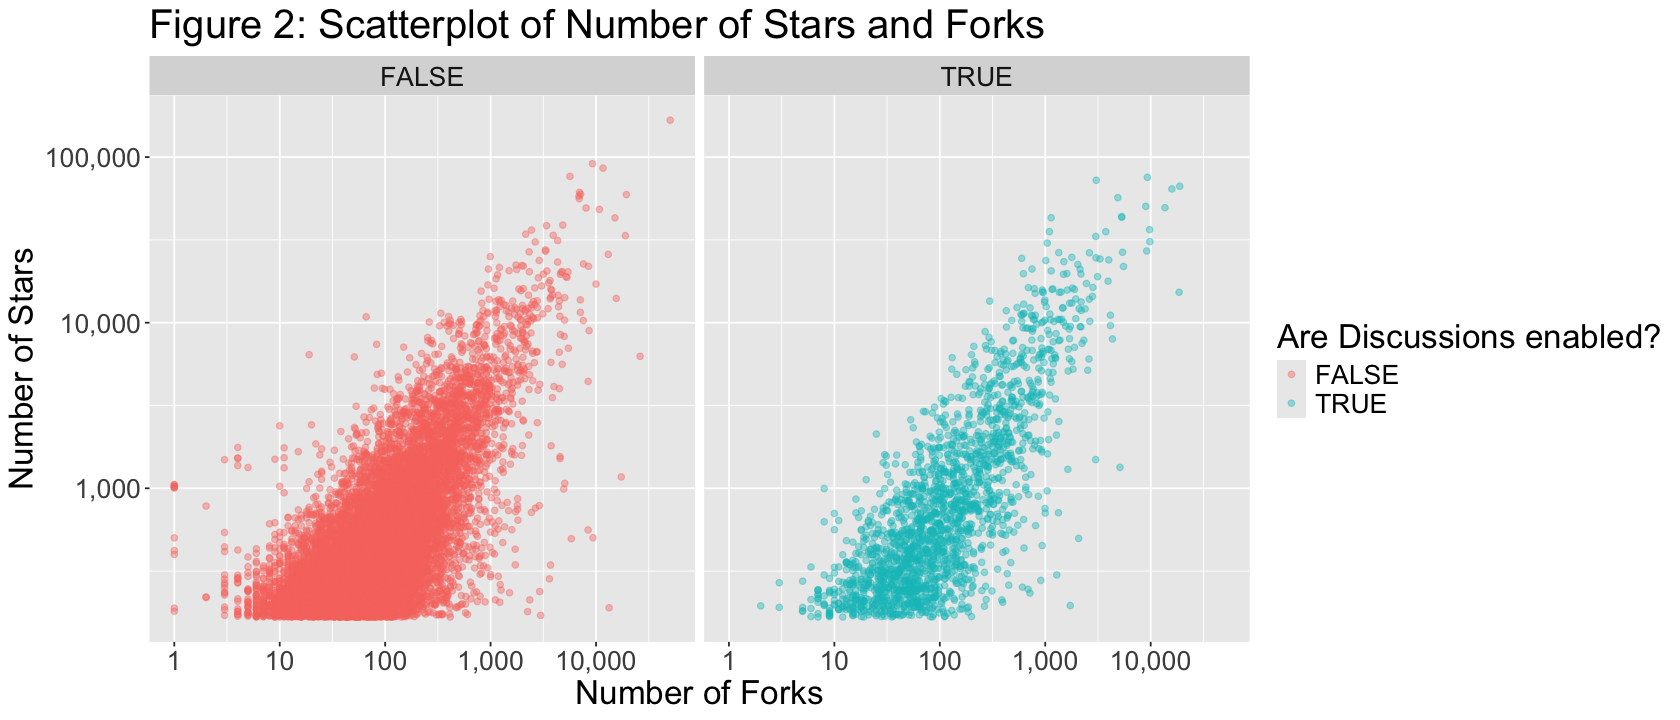

In [11]:
options(repr.plot.width = 14, repr.plot.height = 6)
stars_forks <- ggplot(repos_train, aes(x = Forks, y = Stars, color = Has_Discussions)) + 
                     geom_point(alpha = 0.4, size = 1.5) + 
                     ggtitle("Figure 2: Scatterplot of Number of Stars and Forks") + 
                     labs(x = "Number of Forks", y = "Number of Stars", color = "Are Discussions enabled?") +
                     facet_wrap(vars(Has_Discussions)) + 
                     scale_x_continuous(labels = comma, trans = "log10") + 
                     scale_y_continuous(labels = comma, trans = "log10") + 
                     theme(text = element_text(size = 20)) 
        
stars_forks 

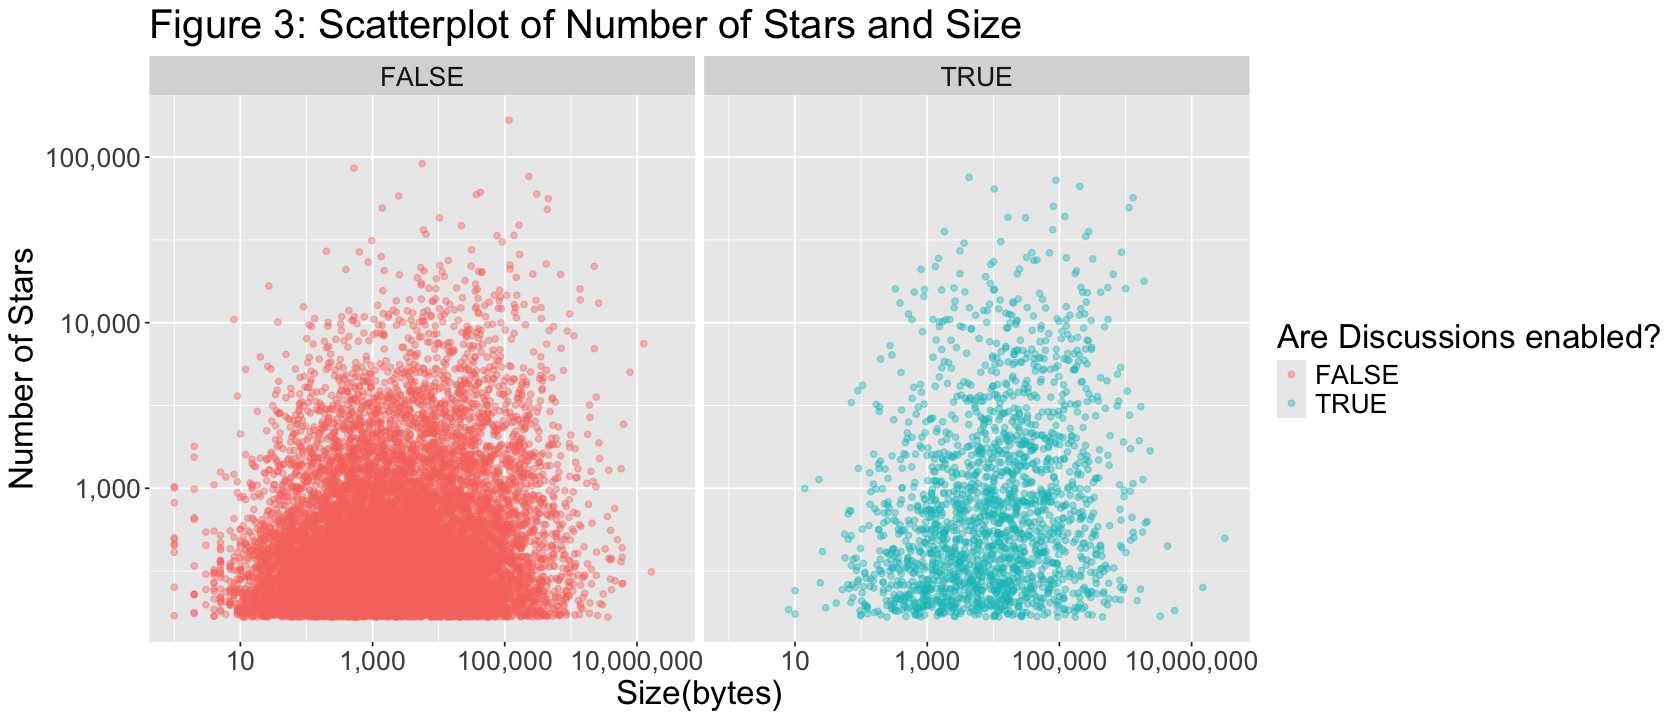

In [12]:
options(repr.plot.width = 14, repr.plot.height = 6)
stars_size <- ggplot(repos_train, aes(x = Size, y = Stars, color = Has_Discussions)) + 
                     geom_point(alpha = 0.4, size = 1.5) + 
                     ggtitle("Figure 3: Scatterplot of Number of Stars and Size") + 
                     labs(x = "Size(bytes)", y = "Number of Stars", color = "Are Discussions enabled?") +
                     facet_wrap(vars(Has_Discussions)) + 
                     scale_x_continuous(labels = comma, trans = "log10") + 
                     scale_y_continuous(labels = comma, trans = "log10") + 
                     theme(text = element_text(size = 20)) 
        
stars_size

Warning message:
“Removed 534 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 534 rows containing non-finite outside the scale range
(`stat_summary()`).”


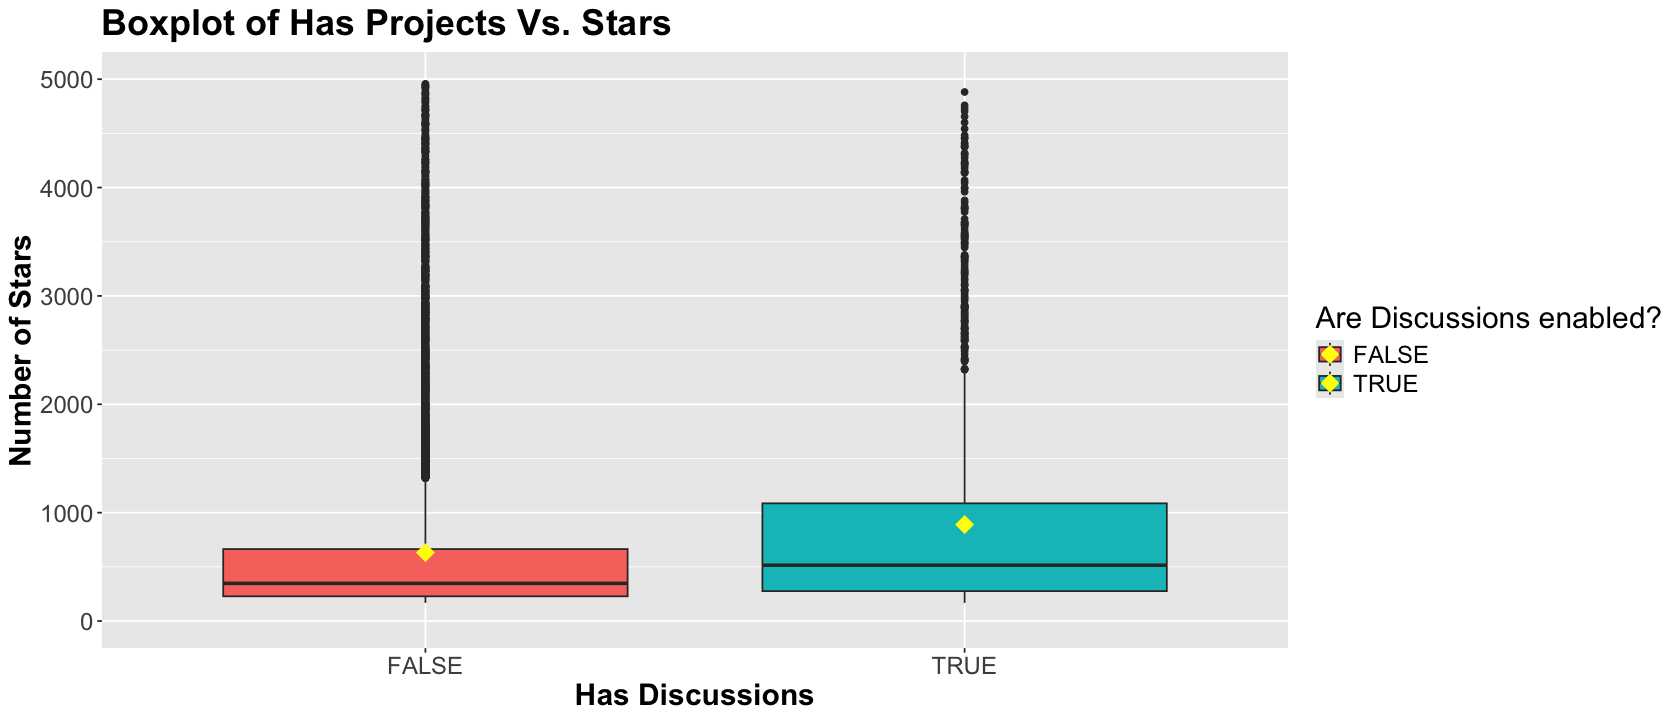

In [13]:
hasProjects_boxplot <- repos_train %>%
    ggplot() +
    geom_boxplot(aes(x = Has_Discussions, y = Stars, fill= Has_Discussions)) + 
    labs(title = "Boxplot of Has Projects Vs. Stars",
    x = "Has Discussions", y = "Number of Stars", fill = "Are Discussions enabled?") + 
    scale_y_continuous(limits = c(0, 5000)) + 
    stat_summary(aes(Has_Discussions, Stars, fill = Has_Discussions),
    fun = mean, colour = "yellow", geom = "point",
    shape = 18, size = 5
    ) +
    theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
    )

hasProjects_boxplot

Observations from Exploratatory Data Analysis

- It appears number of stars and forks have a moderately strong, positive relationship. The points also seem to lie roughly on a straight line.
- It is unclear whether the number of stars has a relationship with several issues and size.
- The relationship between the categorical variables and the response seems to be similar in both categories: for projects with discussions enabled and not. 
- From the boxplot of Stars vs Has_Discussions, it seems that repositories with discussions enabled tend to have a higher number of stars



##### Exploring Presence of any Multicollinearity

We will also create a heatmap of correlations between the continuous explanatory variables (Figure 4) to assess any issues with multicollinearity and identify correlated variables. This would help us ensure that we are confident in our coefficient estimates later during our analysis.

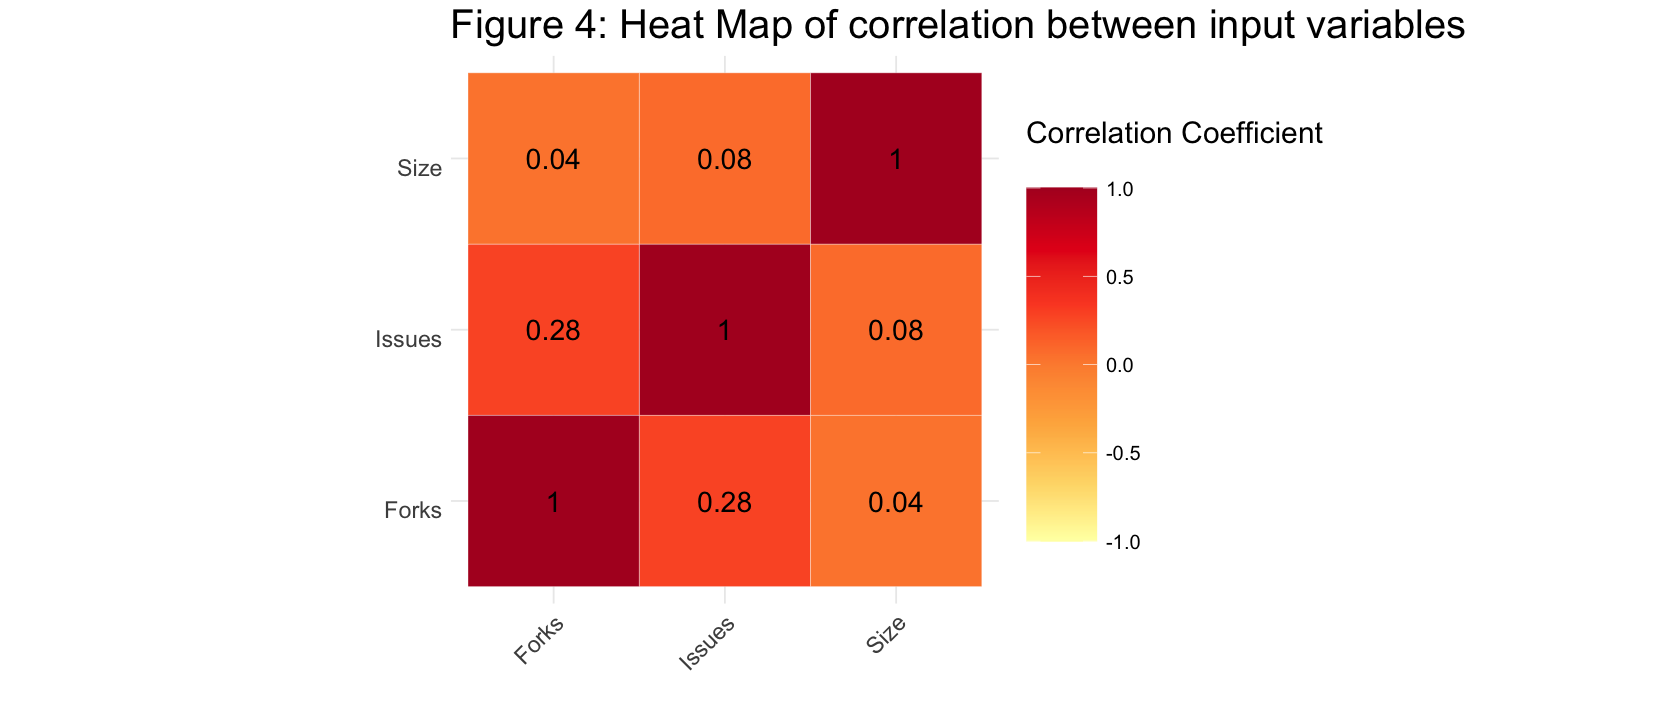

In [14]:
cor_matrix <- repos_train %>%
    select_if(is.numeric) %>%
   select(- Stars) %>% 
   cor() %>%
   as_tibble(rownames = 'var1') %>%
   pivot_longer(-var1, names_to = "var2", values_to = "corr")


plot_cor_matrix <- cor_matrix %>%
    ggplot(aes(var1, var2)) + 
    geom_tile(aes(fill = corr), color = "white") + 
    scale_fill_distiller("Correlation Coefficient \n",
      palette =  "YlOrRd",
      direction = 1, 
      limits = c(-1,1)
    ) +
    labs(x = "", y = "") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
        axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 12),
        legend.key.size = unit(1.5, "cm")
    ) +
    coord_fixed() +
    geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 6) + 
    ggtitle("Figure 4: Heat Map of correlation between input variables") + 
    theme(text = element_text(size = 20))


plot_cor_matrix

None of the input variables are correlated to each other, so we can proceed with our analysis without worrying about multicollinearity. 

### Methods: Plan

In this project, we will perform analysis on the number of Stars a GitHub repository has using the most essential variables that affect the number of Stars a GitHub Repository might get. To start with, we will use to baseline models to compare our model's performance with. The first baseline model is a model where we always perdict the mean number of stars. We expect this model to have $R^2$ close to 0 with a poor performance. The second baseline model we will use is a linear regression model that includes all the variables in the dataset as explanatory variables. Thus, our final model should perform better than the maximal model because the explanatory data analysis showed that the variables we chose are the once most essentail determining the number of stars a repository has. Finally, we will diagnose our model to examine whether any of the linear regression assumptions are violated. 

In [15]:
## A function to compute r_sqr
#  @param: y_actual: actual (true) values of the response variable.
#  @param: y_predicted: predictions of the model.
compute_r_sqr <- function(y_actual, y_predicted) {
    SS_residuals <- sum((y_actual - y_predicted)^2)
    SS_total <- sum((y_actual - mean(y_actual))^2)
    R2 <- 1 - (SS_residuals / SS_total)
    return(R2)
}

## A function to compute adjusted r_sqr
#  @param: y_actual: actual (true) values of the response variable.
#  @param: y_predicted: predictions of the model.
#  @param: p: number of covariates in the model.
compute_adj_r <- function(y_actual, y_predicted, p) {
    r2 <- compute_r_sqr(y_actual, y_predicted)
    n <- length(y_actual)
    adj_r2 <- 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return(adj_r2)

}

## A function to compute adjusted r_sqr
#  @param: model_name: name to give to the model
#  @param: model: the model object
#  @param: results: a data.frame of preious results to add onto.
evaluate_model <- function(model_name, model, results) {
    preds <- predict(model, newdata = repos_test, type = "response")
    model_summry <- summary(model)
    model_results <- data.frame(
        Model = c(model_name, model_name),
        data = c("train", "test"),
        r_sqr = c(round(model_summry$r.squared, 2), round(compute_r_sqr(repos_test$Stars, preds), 2)),
        rmse = c(round(rmse(repos_train$Stars, model$fitted.values)),
                 round(rmse(repos_test$Stars, preds), 2)),
        adj_r_sqr = c(round(model_summry$adj.r.squared, 2), round(compute_adj_r(repos_test$Stars, preds, length(coef(model)) - 1), 2))
        )

    new_results <- rbind(results, model_results)
    return(new_results)
}

In [16]:
mean_model <- lm(Stars ~ 1, data = repos_train)
mean_model_summary <- summary(mean_model)
results <- evaluate_model("mean model", mean_model, results = data.frame())
results

Model,data,r_sqr,rmse,adj_r_sqr
<chr>,<chr>,<dbl>,<dbl>,<dbl>
mean model,train,0,3502.00,0
mean model,test,0,3952.51,0


The results of the mean model are not impressive, but that is expected since the model always predicts the mean number of Stars in the training data. The next model that is tested is the full mode which uses all of the variables in the dataset.

In [17]:
full_model <- lm(Stars ~ ., data = repos_train)
full_model_summary <- summary(full_model)
results <- evaluate_model("full model", full_model, results)
results


Model,data,r_sqr,rmse,adj_r_sqr
<chr>,<chr>,<dbl>,<dbl>,<dbl>
mean model,train,0.00,3502.00,0.00
mean model,test,0.00,3952.51,0.00
full model,train,0.55,2339.00,0.55
full model,test,0.51,2770.84,0.51


In [18]:
full_model_summary %>% tidy() %>% mutate_if(is.numeric, round, 2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),623.72,56.01,11.14,0.00
Issues,0.32,0.09,3.46,0.00
Forks,3.09,0.02,127.79,0.00
Size,0.00,0.00,-0.75,0.45
Has_DiscussionsTRUE,793.90,58.16,13.65,0.00
Has_WikiTRUE,-191.97,58.76,-3.27,0.00
Has_PagesTRUE,87.06,50.74,1.72,0.09
Has_ProjectsTRUE,-208.26,70.44,-2.96,0.00


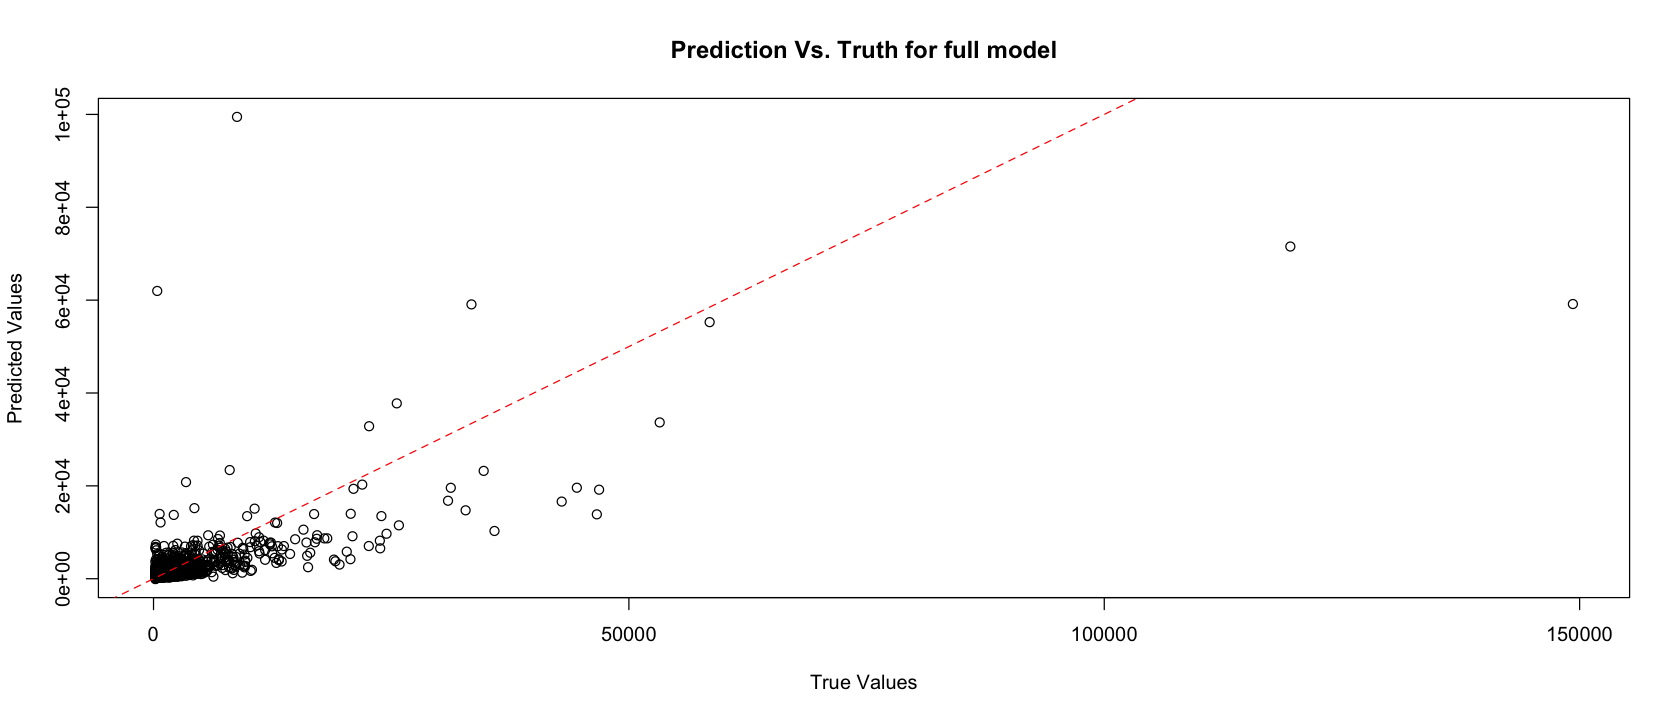

In [19]:
full_preds <- predict(full_model, newdata = repos_test, type = "response")
plot(repos_test$Stars, full_preds, main = "Prediction Vs. Truth for full model", 
    xlab = "True Values", ylab = "Predicted Values")
abline(a = 0, b = 1, col = "red",lty = 2)

The full model significantly outperforms the mean model, achieving an $R^2$ score of 0.51 on the testing data with a root mean squared error (RMSE) of 2770.87. Additionally, the model does not exhibit overfitting, as the $R^2$ scores and RMSE values for the training and testing datasets are relatively similar, which indicates better generalization and potential data-specific characteristics. Moreover, the plot of the true values versus the predicted values shows that predictions are more accurate for lower values of Stars, and the error in the predictions increases as the number of Stars increases.  

Now, we will fit an additive model using the variables of interest 
(Size, Issues, Forks, and discussion setting) without any interaction terms. 

In [20]:
model_add <- lm(Stars ~ Issues + Forks + Size + Has_Discussions, data = repos_train)
model_add_summary <- summary(model_add)
model_add_summary %>% tidy() %>% mutate_if(is.numeric, round, 2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),297.29,21.18,14.03,0.00
Issues,0.33,0.09,3.58,0.00
Forks,3.10,0.02,127.94,0.00
Size,0.00,0.00,-0.65,0.52
Has_DiscussionsTRUE,857.92,57.45,14.93,0.00


In [21]:
results <- evaluate_model("additive model", model_add, results)
results

Model,data,r_sqr,rmse,adj_r_sqr
<chr>,<chr>,<dbl>,<dbl>,<dbl>
mean model,train,0.00,3502.00,0.00
mean model,test,0.00,3952.51,0.00
full model,train,0.55,2339.00,0.55
full model,test,0.51,2770.84,0.51
additive model,train,0.55,2344.00,0.55
additive model,test,0.51,2771.77,0.51


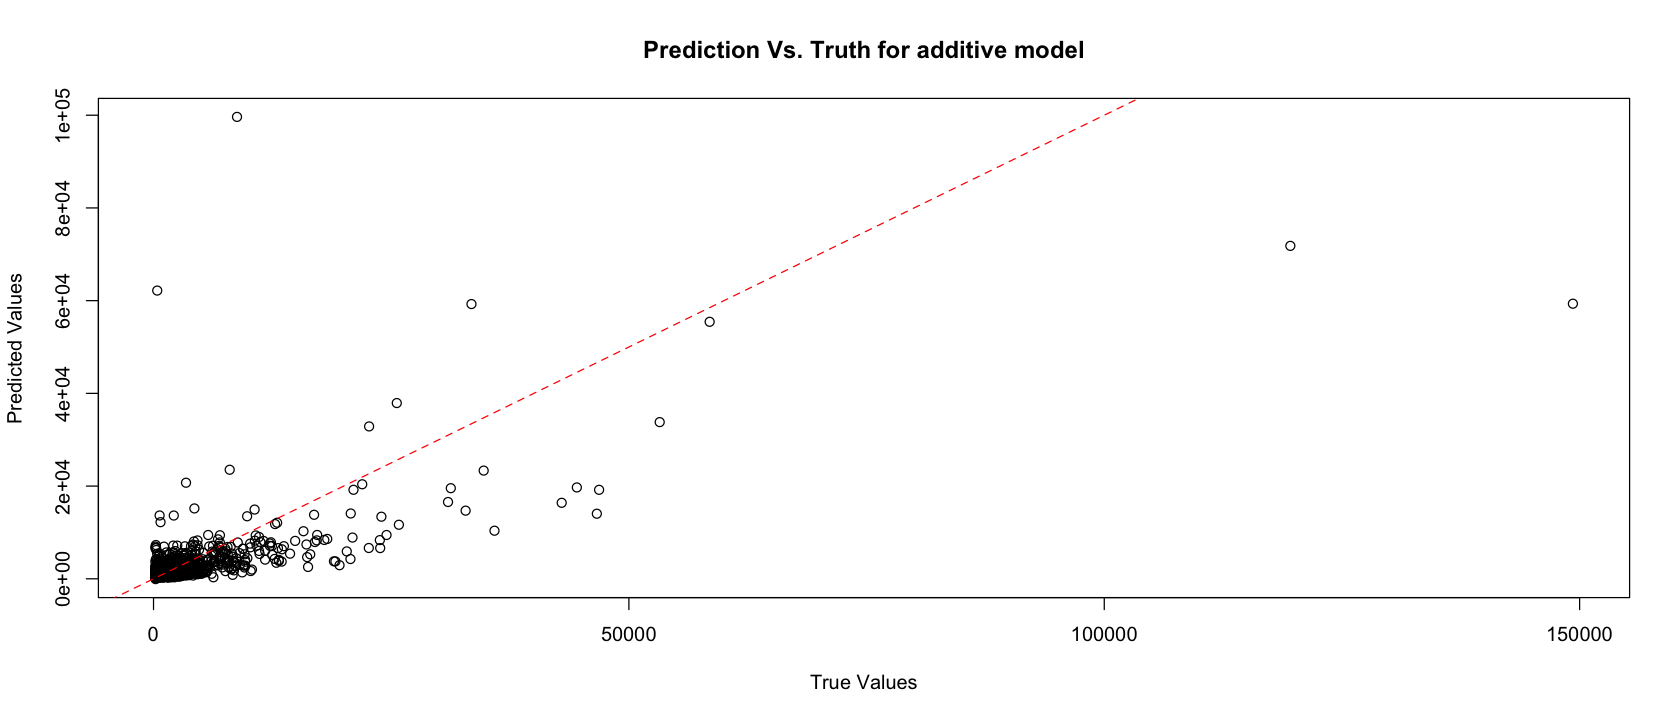

In [22]:
add_preds <- predict(model_add, newdata = repos_test, type = "response")
plot(repos_test$Stars, add_preds, main = "Prediction Vs. Truth for additive model", 
    xlab = "True Values", ylab = "Predicted Values")
abline(a = 0, b = 1, col = "red",lty = 2)

The additive model using number of issues, forks, size of the repository, and discussion setting is performs very similarly to the full model with the same $R^2$ score and slightly worse root mean sqeuared error (RMSE) on the testing and training sets. Also, the $p$-value for the estimated coeffecient of size is higher than $5\%$ indicating not-significance for the size variable in our model. Since the new additive model is less complex than the full model and perfoms as good as the full model, the new additive model is prefered over the full model. 

Morover, the truth versus predictions plot is similar to the one of the additive model and shows the same trend.

In [23]:
inter_model <- lm(Stars ~ Issues * Has_Discussions * Forks, data = repos_train)
inter_model_summary <- summary(inter_model)
inter_model_summary %>% tidy() %>% mutate_if(is.numeric, round, 2)


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),178.81,21.29,8.40,0.00
Issues,5.53,0.22,24.69,0.00
Has_DiscussionsTRUE,374.70,61.13,6.13,0.00
Forks,3.00,0.03,114.35,0.00
Issues:Has_DiscussionsTRUE,-2.13,0.34,-6.24,0.00
Issues:Forks,0.00,0.00,-27.14,0.00
Has_DiscussionsTRUE:Forks,1.38,0.07,21.06,0.00
Issues:Has_DiscussionsTRUE:Forks,0.00,0.00,1.97,0.05


In [24]:
results <- evaluate_model("interaction model", inter_model, results)
results

Model,data,r_sqr,rmse,adj_r_sqr
<chr>,<chr>,<dbl>,<dbl>,<dbl>
mean model,train,0.00,3502.00,0.00
mean model,test,0.00,3952.51,0.00
full model,train,0.55,2339.00,0.55
full model,test,0.51,2770.84,0.51
additive model,train,0.55,2344.00,0.55
additive model,test,0.51,2771.77,0.51
interaction model,train,0.59,2240.00,0.59
interaction model,test,0.42,3016.93,0.42


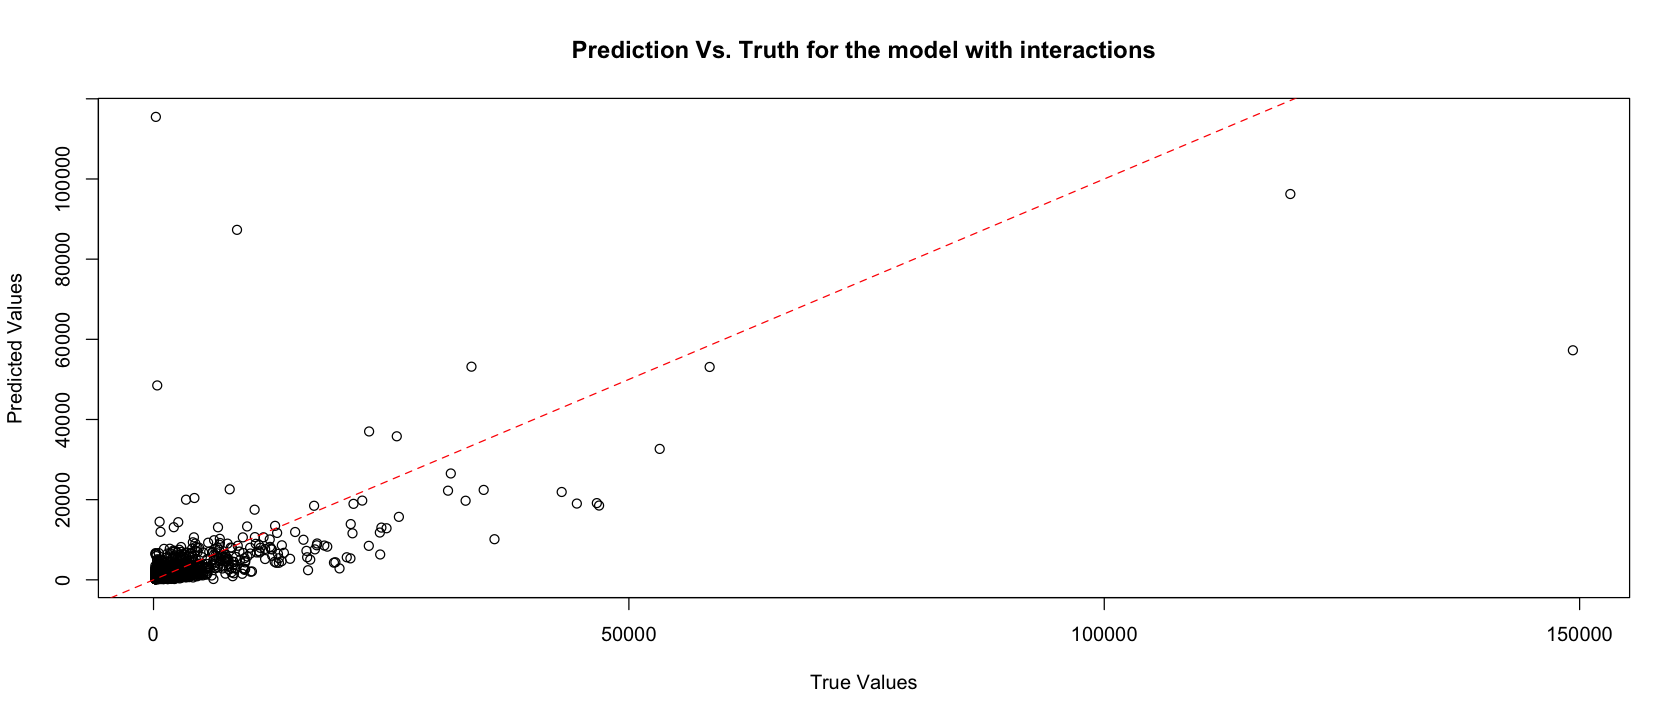

In [25]:
inter_preds <- predict(inter_model, newdata = repos_test, type = "response")
plot(repos_test$Stars, inter_preds, main = "Prediction Vs. Truth for the model with interactions", 
    xlab = "True Values", ylab = "Predicted Values")
abline(a = 0, b = 1, col = "red",lty = 2)

The interaction model shows some improvements to the $R^2$ and root mean squared error (RMSE) for the training data. However, the model seems to overfit since the $R^2$ and (RMSE) for the testing data is significantly lower than those of the training data. Also, the model is harder to interpret than the additive model because of the addition of the interaction terms.

Additionally, the model shows the same trend in the truth versus predictions plot  closer to the line.

For this project, we will choose the the additive model with number of issues and forks, size of the repository, and discussion settings in the repository. We justify our choice because the model does not overfit, explains $55\%$ of the variation in the training data and $51\%$ of the variation in the testing data, and easy to interpret.

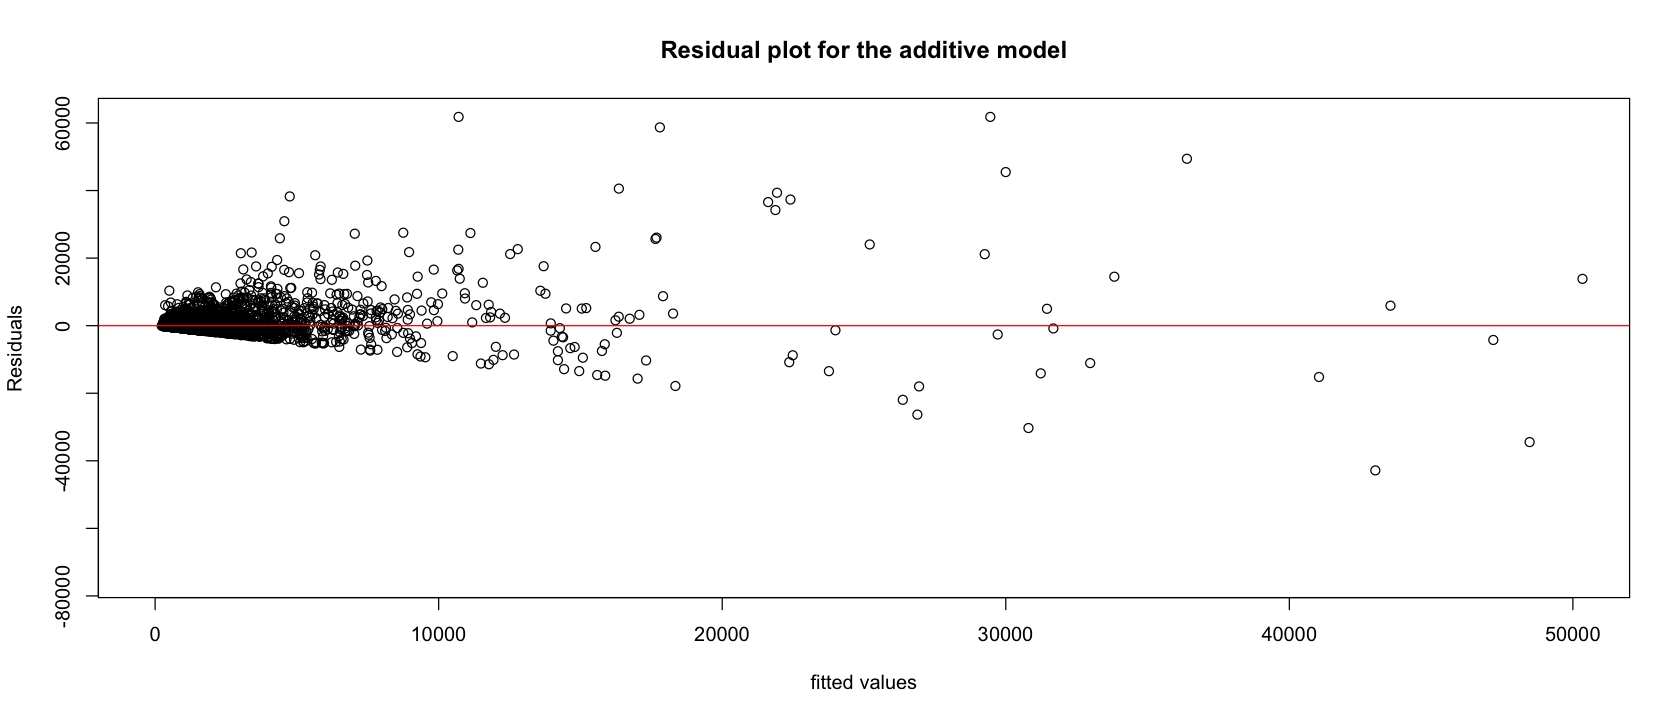

In [26]:
plot(model_add$fitted.values, model_add$residuals, xlim=c(0, 50000), 
    main = "Residual plot for the additive model", 
    xlab = "fitted values", ylab = "Residuals")
abline(h = 0, col = "red")

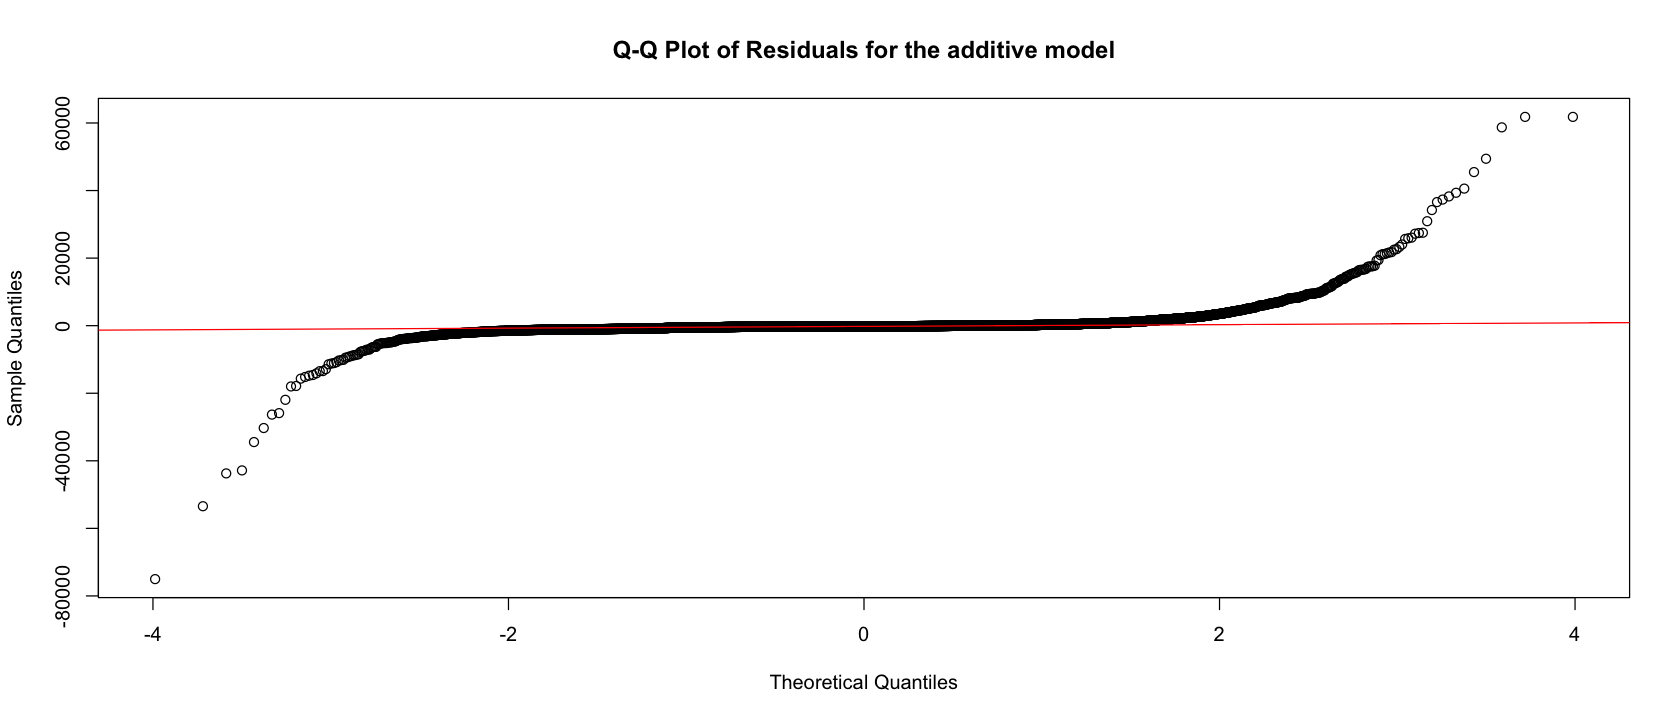

In [27]:
qqnorm(model_add$residuals, main = "Q-Q Plot of Residuals for the additive model")
qqline(model_add$residuals, col = "red")

The residual plots for the additive model reveal a distinct funnel shape, indicating heteroscedasticity—violating the assumption of constant variance (homoscedasticity). The observed pattern suggests that the variability of the errors increases with the predicted values, potentially impacting the reliability of confidence intervals and hypothesis tests. Additionally, the Q-Q plot demonstrates a deviation from the straight diagonal line, highlighting that the error terms do not follow a normal distribution.

## Discussion

Will be done by Zoe

### Reference

Borges, H., Hora, A., & Valente, M. T. (2016). Understanding the factors that impact the popularity of github repositories. 2016 IEEE International Conference on Software Maintenance and Evolution (ICSME). https://doi.org/10.1109/icsme.2016.31 

Wang, T., Wang, S., & Chen, T. (2023). Study the correlation between the readme file of github projects and their popularity. Journal of Systems and Software, 205, 111806. https://doi.org/10.1016/j.jss.2023.111806 